In [1]:
import math   
import numpy as np 
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import pathlib

In [22]:
# Import the Speech Commands dataset
audio_file = pathlib.Path('data/mini_speech_commands/right/0ab3b47d_nohash_0.wav')
signal, sr = librosa.load(audio_file)
print(sr)
ipd.Audio(audio_file) # load a local WAV file

22050


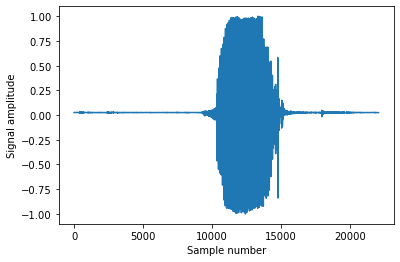

In [8]:
signal=np.interp(signal, (signal.min(), signal.max()), (-1, 1))
plt.plot(signal)
plt.xlabel("Sample number")
plt.ylabel("Signal amplitude")
plt.show()

In [10]:
noise_file = pathlib.Path('data/noise/_background_noise_/10convert.com_Audience-Claps_daSG5fwdA7o.wav')
noise, sr = librosa.load(noise_file)
print(sr)
ipd.Audio(noise_file) # load a local WAV file

22050


In [12]:
noise=np.interp(noise, (noise.min(), noise.max()), (-1, 1))
noise

array([0.02529249, 0.0442657 , 0.1285297 , ..., 0.0723442 , 0.07187344,
       0.07116716])

In [16]:
len(noise)

359257

In [17]:
#crop noise if its longer than signal
#for this code len(noise) shold be greater than len(signal)
#it will not work otherwise!
if(len(noise)>len(signal)):
    noise=noise[0:len(signal)]
len(noise)

22050

In [19]:
def get_noise_from_sound(signal,noise,SNR):
    RMS_s=math.sqrt(np.mean(signal**2))
    #required RMS of noise
    RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/10)))
    
    #current RMS of noise
    RMS_n_current=math.sqrt(np.mean(noise**2))
    noise=noise*(RMS_n/RMS_n_current)
    
    return noise

In [20]:
noise=get_noise_from_sound(signal,noise,SNR=10)

signal_noise=signal+noise

In [23]:
signal.shape

(22050,)

SNR = 10.0


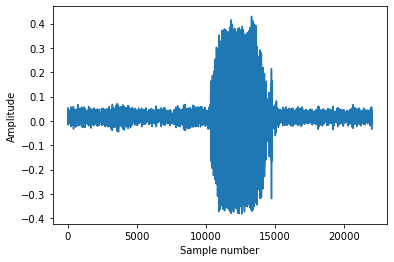

In [24]:
print("SNR = " + str(20*np.log10(math.sqrt(np.mean(signal**2))/math.sqrt(np.mean(noise**2)))))

plt.plot(signal_noise)
plt.xlabel("Sample number")
plt.ylabel("Amplitude")
plt.show()

In [29]:
import soundfile as sf
sf.write("C:/Users/kesha/Desktop/Projects/Voice Command Recognition/noise_example.wav", signal_noise, sr, 'PCM_24')

In [30]:
ipd.Audio("C:/Users/kesha/Desktop/Projects/Voice Command Recognition/noise_example.wav") # load a local WAV file